In [195]:
import numpy as np
import random
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [170]:
n = 40428967  #total number of records in the clickstream data 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
with gzip.open('avazu/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, skiprows = skip_values)

In [172]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004482643316086592,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,66a5f0f3,d9b5648e,...,1,0,21234,320,50,2434,3,163,100088,61
1,10013330254346467994,0,2014-10-21,1005,0,f5476ff8,00e1b9c0,3e814130,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
2,10017891063419751227,0,2014-10-21,1005,0,ceea3181,6225315b,f028772b,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,100084,79
3,1001913075702538566,1,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
4,10019396062291357594,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17264,320,50,1872,3,39,-1,23


In [173]:
train = train.rename(columns={'hour': 'date'})
train.head()

,id,click,date,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10004482643316086592,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,66a5f0f3,d9b5648e,...,1,0,21234,320,50,2434,3,163,100088,61
1,10013330254346467994,0,2014-10-21,1005,0,f5476ff8,00e1b9c0,3e814130,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
2,10017891063419751227,0,2014-10-21,1005,0,ceea3181,6225315b,f028772b,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,100084,79
3,1001913075702538566,1,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
4,10019396062291357594,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17264,320,50,1872,3,39,-1,23


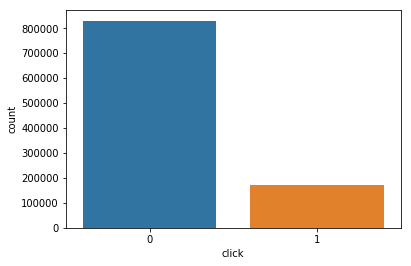

In [132]:

sns.countplot(train['click'])

plt.show();

In [133]:
train['click'].value_counts()/len(train)


0    0.83003
1    0.16997
Name: click, dtype: float64

In [134]:
train['date'].describe()

count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    10906
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: date, dtype: object

Text(0.5,1,'clicks per hour')

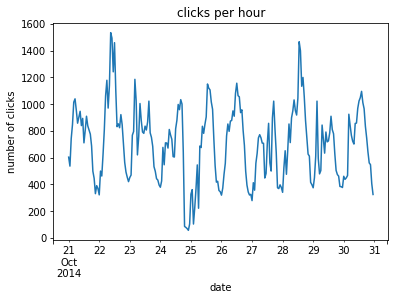

In [135]:
train['click'].groupby(train['date']).sum().plot()
plt.ylabel('number of clicks')
plt.title('clicks per hour')

#peak hours on 22 and 28 mid day
#low end of clicks at end of 24 into 25

In [136]:
#which hours have the most clicks 
train['hour'] = train.date.apply(lambda x: x.hour)

In [137]:
train.head()

,id,click,date,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour
0,10001966791793526909,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15701,320,50,1722,0,35,-1,79,0
1,10006789981076459409,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,0,20596,320,50,2161,0,35,-1,157,0
2,10007830732992705885,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,a607e6a7,7801e8d9,...,0,21665,320,50,2493,3,35,-1,117,0
3,10009147085943364421,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,17037,320,50,1934,2,39,-1,16,0
4,1001156047808171144,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,15708,320,50,1722,0,35,100084,79,0


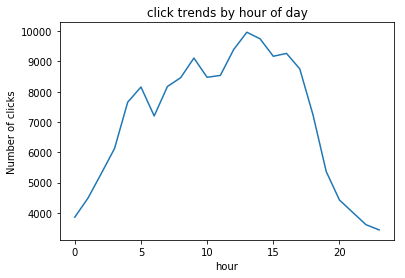

In [138]:
train['click'].groupby(train['hour']).sum().plot()
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

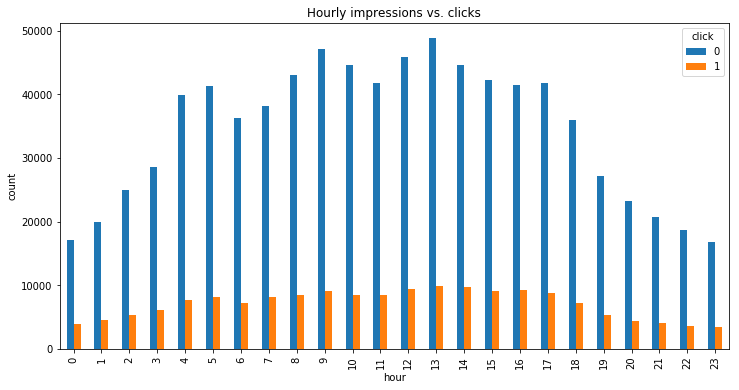

In [139]:
train.groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

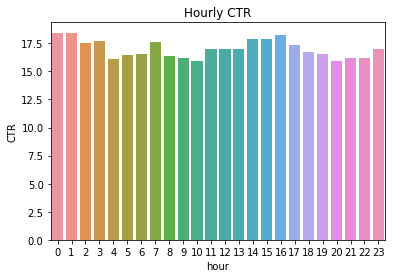

In [140]:
df_click = train[train['click'] == 1]

df_hour = train[['hour','click']].groupby(['hour']).count().reset_index()

df_hour = df_hour.rename(columns={'click': 'impressions'})

df_hour['clicks'] = df_click[['hour','click']].groupby(['hour']).count().reset_index()['click']

df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100


sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR');

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


Text(0.5,1,'click trends by day of week')

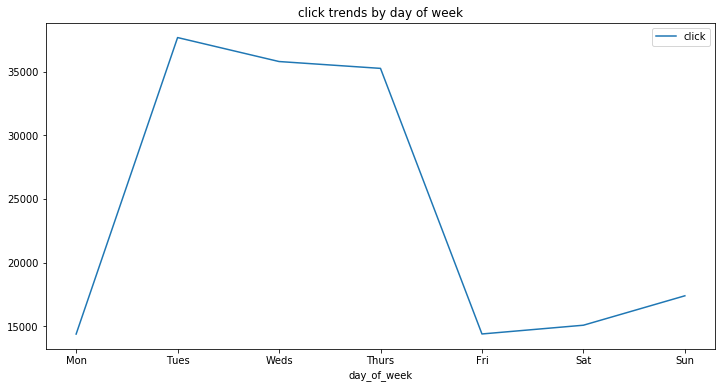

In [141]:
train['day_of_week'] = train['date'].apply(lambda val: val.weekday_name)

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))

ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear

labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')

In [142]:
train.head()

,id,click,date,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,hour,day_of_week
0,10001966791793526909,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15701,320,50,1722,0,35,-1,79,0,Tuesday
1,10006789981076459409,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,20596,320,50,2161,0,35,-1,157,0,Tuesday
2,10007830732992705885,0,2014-10-21,1010,1,85f751fd,c4e18dd6,50e219e0,a607e6a7,7801e8d9,...,21665,320,50,2493,3,35,-1,117,0,Tuesday
3,10009147085943364421,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,17037,320,50,1934,2,39,-1,16,0,Tuesday
4,1001156047808171144,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,15708,320,50,1722,0,35,100084,79,0,Tuesday


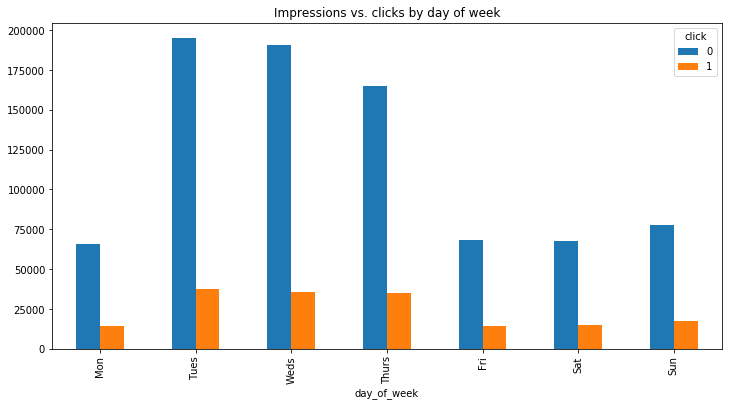

In [143]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', 
                                                                           title="Day of the Week", figsize=(12,6))

ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

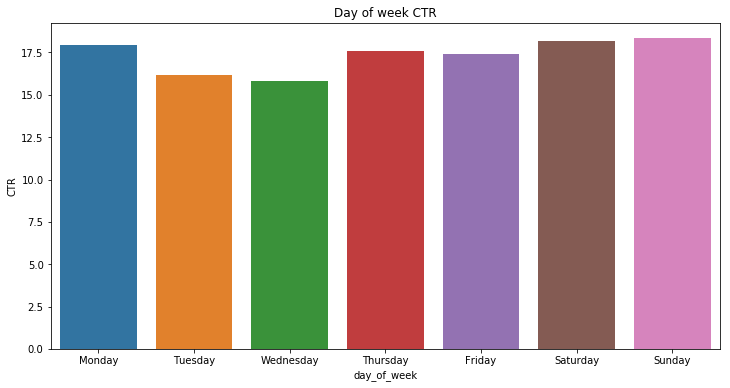

In [144]:
df_click = train[train['click'] == 1]

df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()

df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})

df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']

df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

In [145]:
print(train.C1.value_counts()/len(train))

1005    0.918762
1002    0.054903
1010    0.022148
1012    0.002948
1007    0.000865
1001    0.000237
1008    0.000137
Name: C1, dtype: float64


In [146]:
C1_values = train.C1.unique()

C1_values.sort()

ctr_avg_list=[]

for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.0295358649789
for C1 value: 1002,  click through rate: 0.212192412072
for C1 value: 1005,  click through rate: 0.169457378516
for C1 value: 1007,  click through rate: 0.0416184971098
for C1 value: 1008,  click through rate: 0.109489051095
for C1 value: 1010,  click through rate: 0.0934170128228
for C1 value: 1012,  click through rate: 0.170284938942


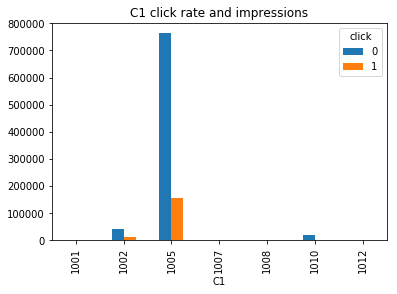

In [147]:
train.groupby(['C1','click']).size().unstack().plot(kind = 'bar', title = 'C1 click rate and impressions')

Text(0.5,1,'Barplot of C1 CTR')

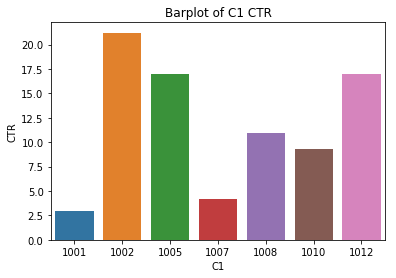

In [148]:
df_c1 = train[['C1', 'click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns = {'click':'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100


sns.barplot(y = 'CTR', x = 'C1', data = df_c1)
plt.title('Barplot of C1 CTR')


In [149]:
print len(train['C14'].unique())
print len(train['C15'].unique())
print len(train['C16'].unique())
print len(train['C17'].unique())
print len(train['C18'].unique())
print len(train['C19'].unique())
print len(train['C20'].unique())
print len(train['C21'].unique())

2254
8
9
420
4
66
161
60


Text(0.5,1,'Barplot of C14 CTR')

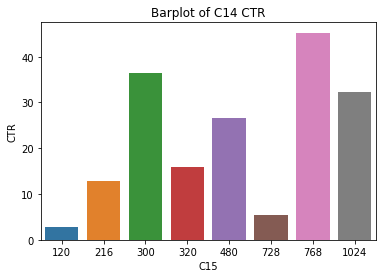

In [150]:
df_c15 = train[['C15', 'click']].groupby(['C15']).count().reset_index()
df_c15 = df_c15.rename(columns = {'click':'impressions'})
df_c15['clicks'] = df_click[['C15','click']].groupby(['C15']).count().reset_index()['click']
df_c15['CTR'] = df_c15['clicks']/df_c15['impressions']*100


sns.barplot(y = 'CTR', x = 'C15', data = df_c15)
plt.title('Barplot of C14 CTR')


In [151]:
#banner positoin
print(train.banner_pos.value_counts()/len(train))

0    0.720110
1    0.278073
7    0.001073
2    0.000324
4    0.000224
5    0.000134
3    0.000062
Name: banner_pos, dtype: float64


In [152]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.164565135882
for banner position: 1,  click through rate: 0.183361922948
for banner position: 2,  click through rate: 0.141975308642
for banner position: 3,  click through rate: 0.274193548387
for banner position: 4,  click through rate: 0.241071428571
for banner position: 5,  click through rate: 0.111940298507
for banner position: 7,  click through rate: 0.321528424977


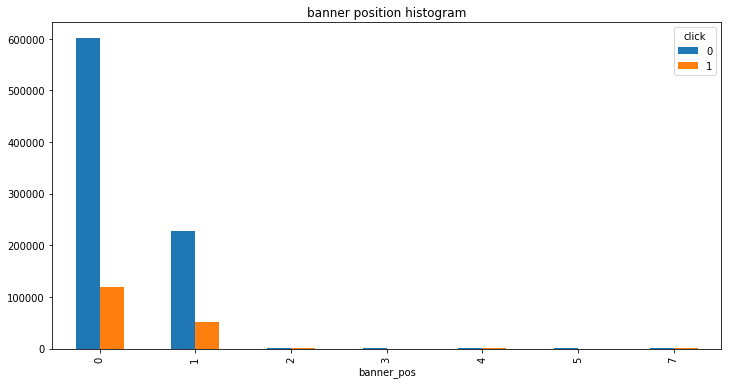

In [153]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

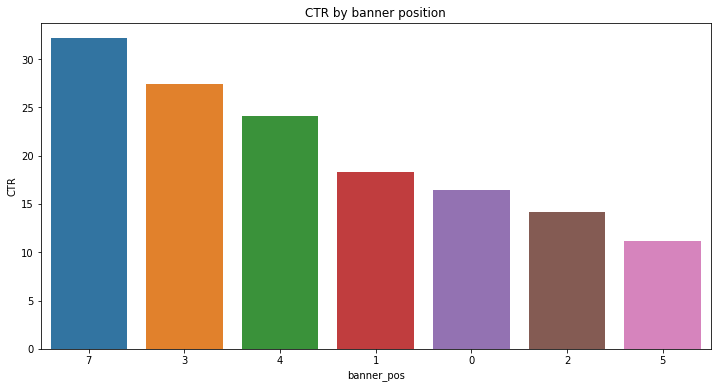

In [154]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()

df_banner = df_banner.rename(columns={'click': 'impressions'})

df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']

df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100

sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [190]:

for col in train.columns: 
    
    print(col) 

id
click
date
C1
banner_pos
site_id
site_domain
site_category
app_id
app_domain
app_category
device_id
device_ip
device_model
device_type
device_conn_type
C14
C15
C16
C17
C18
C19
C20
C21
